In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 300)
# display notebook in full width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [171]:
covid = pd.read_csv('covid_country.csv', encoding = "ISO-8859-1")
covid.head()
covid['DeathRate%'] = covid.TotalDeaths * 100/ covid.TotalCases
covid['DeathRate%']  = covid['DeathRate%'].round(2) 

# covid['RecovryRate'] = covid.TotalRecovered * 100 /  covid.TotalCases

In [172]:
covid.shape

(214, 13)

In [173]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          214 non-null    object 
 1   TotalCases       214 non-null    int64  
 2   NewCases         81 non-null     float64
 3   TotalDeaths      175 non-null    float64
 4   NewDeaths        48 non-null     float64
 5   TotalRecovered   205 non-null    float64
 6   ActiveCases      214 non-null    int64  
 7   SeriousCritical  135 non-null    float64
 8   TotalCaserPerM   212 non-null    float64
 9   DeathsPerM       173 non-null    float64
 10  TotalTests       179 non-null    float64
 11  TestPerM         179 non-null    float64
 12  DeathRate%       175 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 21.9+ KB


## Cleaning Data

In [174]:
keep_cols = [ 'TotalCaserPerM','DeathsPerM', 'TestPerM' ,'DeathRate%']
# keep_cols = [ 'DeathsPerM', 'TestPerM' ,'DeathRate%']

display_cols = ['Country', 'TotalCases'] + keep_cols
covidCluster = covid.copy()
covidCluster[display_cols].head()

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%
0,USA,1134059,3426.0,199.0,20281.0,5.81
1,Spain,245567,5252.0,537.0,32699.0,10.22
2,Italy,207428,3431.0,467.0,33962.0,13.61
3,UK,177454,2614.0,405.0,15082.0,15.50
4,France,167346,2564.0,377.0,16856.0,14.70


In [175]:
covidCluster[covidCluster[display_cols].isna().any(axis = 1)][display_cols].head()

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%
10,China,82875,58.0,3.0,NaN,5.59
72,Cameroon,1832,69.0,2.0,NaN,3.33
77,Guinea,1537,117.0,0.5,NaN,0.46
98,Diamond Princess,712,NaN,NaN,NaN,1.83
100,Burkina Faso,649,31.0,2.0,NaN,6.78


In [176]:
covidCluster = covidCluster[display_cols].dropna()

In [177]:
covidCluster = covidCluster[covidCluster.Country != 'San Marino']

In [178]:
# covidCluster = covidCluster.head(100)

In [179]:
# covidCluster.head(100)

## Visualizaing data

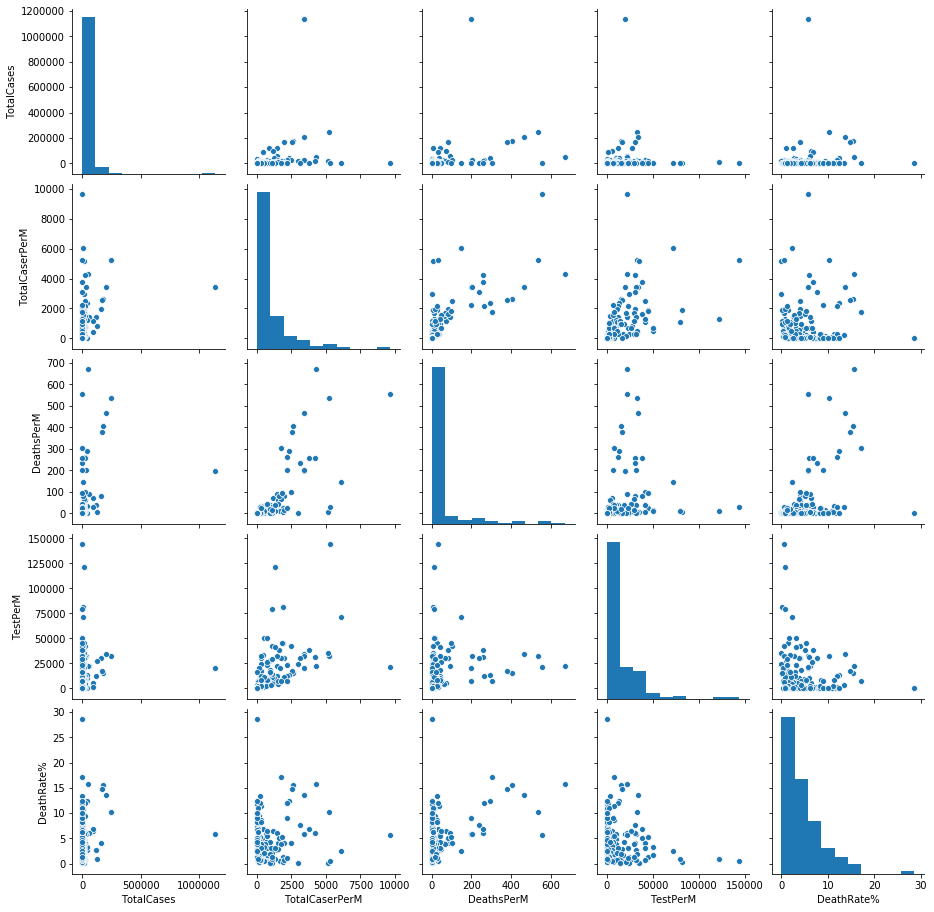

In [180]:
sns.pairplot(covidCluster)

## Kmeans

In [181]:

X = covidCluster[keep_cols]

In [182]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=2)
# covidImputed = imputer.fit_transform(covidCluster)
# pd.DataFrame(covidImputed)

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3
0,1.795211,1.352515,0.297410,0.277567
1,3.090190,4.376464,0.891177,1.312187
2,1.798757,3.750202,0.951568,2.107508
3,1.219350,3.195513,0.048820,2.550916
4,1.183890,2.945009,0.133644,2.363230


In [184]:
from sklearn.cluster import KMeans
k =5
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)
y_pred

array([3, 0, 0, 0, 0, 3, 1, 1, 1, 2, 3, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3, 2,
       1, 3, 1, 3, 1, 3, 3, 1, 1, 4, 1, 1, 2, 1, 3, 1, 2, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 4, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1,
       3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 2, 2, 2, 3,
       2, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2])

In [185]:
kmeans.inertia_

169.53826003758502

### Find optimal Number of Clusters

In [186]:
kmeans_per_k = [KMeans( n_clusters= k, random_state= 42).fit(X) for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]


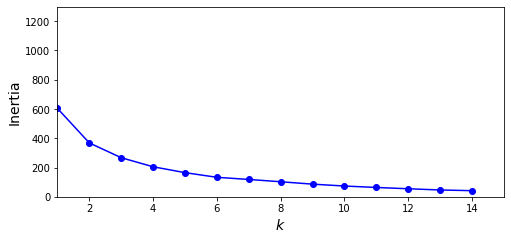

In [187]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 15), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(4, inertias[3]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )
plt.axis([1, 15, 0, 1300])
# save_fig("inertia_vs_k_plot")
plt.show()

In [188]:
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

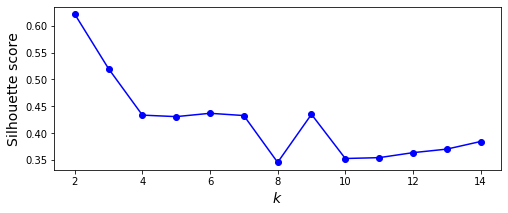

In [189]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 15), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])
# save_fig("silhouette_score_vs_k_plot")
plt.show()

## Run Kmeans for Optimal Clusters

In [190]:
k = 3
kmeans = KMeans(n_clusters = k, random_state= 42)
y_pred = kmeans.fit_predict(X)
y_pred

array([0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [191]:

covidCluster['cluster'] = y_pred
covidCluster = covidCluster.sort_values(by = ['cluster', 'TotalCases'], ascending = False)
covidCluster.head()

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
5,Germany,164197,1960.0,80.0,30400.0,4.10,2
19,Portugal,25190,2470.0,100.0,41860.0,4.06,2
24,Singapore,17548,2999.0,3.0,24600.0,0.09,2
26,Israel,16152,1866.0,26.0,45060.0,1.41,2
28,Austria,15558,1727.0,66.0,29936.0,3.83,2


In [192]:
agg = {
        'Count': pd.NamedAgg(column = 'cluster', aggfunc = 'count'),
        'MeanTotalCaserPerM':pd.NamedAgg(column = 'TotalCaserPerM', aggfunc = 'mean'),
        'MeanDeathsPerM':pd.NamedAgg(column = 'DeathsPerM', aggfunc = 'mean'),
        'MeanTestPerM':pd.NamedAgg(column = 'TestPerM', aggfunc = 'mean'),
        'MeanDeathRate%':pd.NamedAgg(column = 'DeathRate%', aggfunc = 'mean'),
        
       
}
# group = covidCluster.groupby(['cluster']).agg({'cluster': 'count',  'TotalCaserPerM': 'mean', 'DeathsPerM': 'mean', 'TestPerM': 'mean', 'DeathRate':'mean'} ).rename(columns = ['1', '2', '3', '4', '5', '6'])
group = covidCluster.groupby('cluster').agg(**agg)
group.round(2)

,Count,MeanTotalCaserPerM,MeanDeathsPerM,MeanTestPerM,MeanDeathRate%
cluster,,,,,
0,15,3615.60,348.27,22325.00,10.56
1,117,328.18,10.23,6503.11,4.26
2,19,2234.74,42.11,54077.37,2.19


## Cluster 0

In [193]:
covidCluster[covidCluster.cluster == 0]

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
0,USA,1134059,3426.0,199.0,20281.0,5.81,0
1,Spain,245567,5252.0,537.0,32699.0,10.22,0
2,Italy,207428,3431.0,467.0,33962.0,13.61,0
3,UK,177454,2614.0,405.0,15082.0,15.50,0
4,France,167346,2564.0,377.0,16856.0,14.70,0
12,Belgium,49517,4273.0,670.0,22520.0,15.68,0
14,Netherlands,40236,2348.0,291.0,13184.0,12.39,0
16,Switzerland,29817,3445.0,203.0,31890.0,5.88,0
20,Sweden,22082,2186.0,264.0,11833.0,12.09,0
21,Ireland,20833,4219.0,256.0,31179.0,6.07,0


## Cluster 1

In [194]:
covidCluster[covidCluster.cluster == 1]

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
6,Russia,124054,850.0,8.00,27036.0,0.99,1
7,Turkey,122392,1451.0,39.00,12747.0,2.66,1
8,Iran,96448,1148.0,73.00,5769.0,6.38,1
9,Brazil,92630,436.0,30.00,1597.0,6.95,1
11,Canada,55061,1459.0,90.00,22050.0,6.16,1
13,Peru,40459,1227.0,34.00,10388.0,2.78,1
15,India,37336,27.0,0.90,708.0,3.28,1
17,Ecuador,26336,1493.0,60.00,4078.0,4.04,1
18,Saudi Arabia,25459,731.0,5.00,9760.0,0.69,1
22,Mexico,20739,161.0,15.00,707.0,9.51,1


## Cluster 2

In [195]:
covidCluster[covidCluster.cluster == 2]

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
5,Germany,164197,1960.0,80.0,30400.0,4.10,2
19,Portugal,25190,2470.0,100.0,41860.0,4.06,2
24,Singapore,17548,2999.0,3.0,24600.0,0.09,2
26,Israel,16152,1866.0,26.0,45060.0,1.41,2
28,Austria,15558,1727.0,66.0,29936.0,3.83,2
29,Qatar,14872,5162.0,4.0,35309.0,0.08,2
32,UAE,13038,1318.0,11.0,121330.0,0.85,2
37,Denmark,9407,1624.0,82.0,38312.0,5.05,2
41,Norway,7783,1436.0,39.0,31835.0,2.70,2
52,Kuwait,4619,1082.0,8.0,41915.0,0.71,2


In [196]:
covidCluster[covidCluster.cluster == 3]

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster


In [197]:
covidCluster.shape

(151, 7)

In [198]:
covidCluster.to_csv('clusters.csv')

## DBSCAN

In [199]:
from sklearn.cluster import DBSCAN

In [200]:
dbscan = DBSCAN(eps = 2, min_samples = 5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [201]:
covidCluster['cluster'] = dbscan.labels_
covidCluster = covidCluster.sort_values(by = ['cluster', 'TotalCases'], ascending = False)
covidCluster.head(200)

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
0,USA,1134059,3426.0,199.00,20281.0,5.81,0
1,Spain,245567,5252.0,537.00,32699.0,10.22,0
2,Italy,207428,3431.0,467.00,33962.0,13.61,0
3,UK,177454,2614.0,405.00,15082.0,15.50,0
4,France,167346,2564.0,377.00,16856.0,14.70,0
5,Germany,164197,1960.0,80.00,30400.0,4.10,0
6,Russia,124054,850.0,8.00,27036.0,0.99,0
7,Turkey,122392,1451.0,39.00,12747.0,2.66,0
8,Iran,96448,1148.0,73.00,5769.0,6.38,0
9,Brazil,92630,436.0,30.00,1597.0,6.95,0


## AgglomerativeClustering

In [202]:
from sklearn.cluster import AgglomerativeClustering

In [216]:
aggcluster = AgglomerativeClustering(n_clusters = 3, affinity= 'euclidean', linkage = 'complete')
y_pred = aggcluster.fit_predict(X)
covidCluster['cluster'] = y_pred
covidCluster = covidCluster.sort_values(by = ['cluster', 'TotalCases'], ascending = False)
covidCluster.head(200)

,Country,TotalCases,TotalCaserPerM,DeathsPerM,TestPerM,DeathRate%,cluster
15,India,37336,27.0,0.90,708.0,3.28,2
25,Chile,17008,890.0,12.00,9910.0,1.38,2
27,Belarus,15828,1675.0,10.00,20682.0,0.61,2
46,Panama,6720,1557.0,44.00,7392.0,2.86,2
89,Honduras,899,91.0,8.00,368.0,8.34,2
157,Liechtenstein,82,2151.0,26.00,23605.0,1.22,2
1,Spain,245567,5252.0,537.00,32699.0,10.22,1
3,UK,177454,2614.0,405.00,15082.0,15.50,1
5,Germany,164197,1960.0,80.00,30400.0,4.10,1
6,Russia,124054,850.0,8.00,27036.0,0.99,1


In [217]:
group = covidCluster.groupby('cluster').agg(**agg)
group.round(2)

,Count,MeanTotalCaserPerM,MeanDeathsPerM,MeanTestPerM,MeanDeathRate%
cluster,,,,,
0,130,756.22,41.05,12979.88,4.73
1,15,2026.07,118.89,24877.33,4.40
2,6,1065.17,16.82,10444.17,2.95
